<a href="https://colab.research.google.com/github/maronem/PyTorch/blob/main/01_pytorch_workflow_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow

Let's explore an example PyTorch end-to-end workflow

Resources:
* Book version of notebook: https://www.learnpytorch.io/01_pytorch_workflow/

In [20]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to the data (training)",
                      4: "making predictions and evaluate a model (inference)",
                      5: "save and loading a model",
                      6: "putting it all together"}

what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to the data (training)',
 4: 'making predictions and evaluate a model (inference)',
 5: 'save and loading a model',
 6: 'putting it all together'}

In [21]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

#Check PyTorch version
torch.__version__

'1.13.1+cu116'

## 1. Data (preparing and loading)

Machine learning is a game of two parts:
1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation

Lets create some *known* data using the linear regression formula 

We'll use a linear regression formula to make a straight line with *known* **parameters**

In [22]:
# Create *known* parameters

weight = 0.7 
bias = 0.3

# Create some data

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step=step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

Text(0.5, 1.0, 'Linear Regression Data')

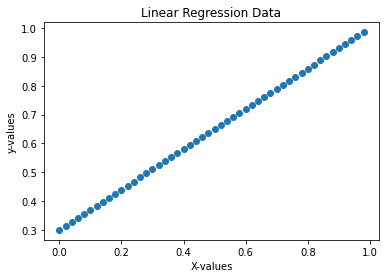

In [23]:
plt.scatter(X,y)
plt.ylabel("y-values")
plt.xlabel("X-values")
plt.title("Linear Regression Data")

In [24]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important concepts in ML)

Let's create training and test set with our data

In [25]:
# Create a train/test split

train_split = int(0.8 * len(X)) #80% train data
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

"Visualize, visualize, visualize"

In [26]:
# Visualize X_train, y_train

def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data, and compares predictions
  """

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

  # Plot test data in red
  plt.scatter(test_data, test_labels, c="g",s=4, label="Testing Data")

  # Are there predictions?
  if predictions is not None:
    # Plot predictions in green (if they exist)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  #Show legend
  plt.legend(prop={"size": 10});

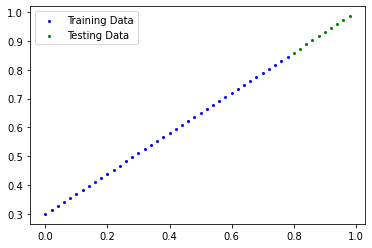

In [27]:
plot_predictions()

## 2. Build model

Our first PyTorch model!

Linear regression model: Y = m * X + b

We will be building classes throughout the course, get familiar with OOP in Python: 

https://realpython.com/python3-object-oriented-programming/


ex) `class Dog: -(Class) - each Dog within the class is an Object` 

    species = "Canis familiaris" -(class attribute)
    def __init__(self, name, age): 
        self.name = name -(instance attribute)
        self.age = age` -(instance attribute)

* .__init__() sets the initial state of the object by assigning the values of the object’s properties
* You can give .__init__() any number of parameters, but the first parameter will always be a variable called self
* Attributes created in .__init__() are called **instance attributes** - all Dog objects will have name & age but values for *name* and *age* will vary depending on the Dog instance

**What our model does:**
* Star with random values (weight & bias)
* Look at training data and adjust random values to better represent (or get closer to) the ideal values (weight & bias we used to create the data)

How does it do so?

Through two main algorithms:
1. Gradient descent:
  * an iterative first-order optimisation algorithm used to find a local min/max of a given function to minimise a cost/loss function 
2. Backpropagation:
  * backpropagation computes the gradient of the loss function with respect to the weights of the network for a single input–output example

In [42]:
from torch import nn

# Create linear regression model
class LinearRegressionModel(nn.Module): #almost everything in PyTorch inherets from nn.module subclass
  def __init__(self):
    super().__init__()

    # Initialize the model parameters to be used in compuations
    self.weights = nn.Parameter(torch.randn(1, #nn.Parameter stores tensors that can be used with nn.Module
                                            requires_grad=True, #used for updating model parameters via gradient descent
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                        requires_grad=True,
                                        dtype=torch.float))
    
  # forward() defines the compuation in the model and is required when calling nn.Module subclass
  # this defines the compuation that takes place on the data passed to the particular nn.Module
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data 
    return self.weights * x + self.bias #this is the linear regression formula

### PyTorch model building essentials

* `torch.nn` - contains all of the building blocks for computational graphs (neural network can be considered a computational graph)
* `torch.nn.Parameter` - what paramaters should our model try and learn (often a PyTorch layer from torch.nn will set these for us)
* `torch.nn.Module` - base class for all neural network modules; if you subclass it, you should overwrite forward()
* `torch.optim` - this is where the optimizers in PyTorch live, it will help with gradient descent and optimize the weights and biases
* `def forward()` - all nn.Module sublcasses require you to overwrite forward(), this method defines what happens in the forward computation


### Checking the content of our PyTorch model

Now we've created a model, let's see whats inside...

We can check out our model parameters or what's inside by using `.parameters()`

In [43]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of our model (this is a subclass of nn.module)
model_0 = LinearRegressionModel()
model_0

# Check model parameters - parameter values are what they are because they are random! Setting manual seed keeps them consistent every run
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

Purpose of our NN is to adjust the weights and bias parameters to be as close to our defined weight and bias as possible to best predict our data

In [44]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [31]:
# defined weight and bias
weight, bias

(0.7, 0.3)

### Making predictions using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`

When we pass data through our model, it's going to run it through the `forward()` method

In [32]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]), tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [45]:
# Make predictions with model
with torch.inference_mode(): # context manager `inference_mode` disables gradient tracking - reduces computing time 
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

See more on `inference_mode()`: here https://twitter.com/PyTorch/status/1437838231505096708?s=20&t=UIAwRE5XeXTY-7e8P5tSZw
 * Can also use `torch.no_grad()`, but doesnt do as much as inference_mode and is preffered

In [46]:
print(list(y_test))
print(list(y_preds))

[tensor([0.8600]), tensor([0.8740]), tensor([0.8880]), tensor([0.9020]), tensor([0.9160]), tensor([0.9300]), tensor([0.9440]), tensor([0.9580]), tensor([0.9720]), tensor([0.9860])]
[tensor([0.3982]), tensor([0.4049]), tensor([0.4116]), tensor([0.4184]), tensor([0.4251]), tensor([0.4318]), tensor([0.4386]), tensor([0.4453]), tensor([0.4520]), tensor([0.4588])]


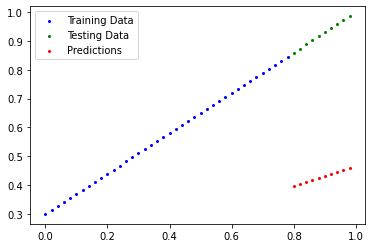

In [47]:
plot_predictions(predictions=y_preds)

## 3. Train model

The whole idea of training is for a model to move from some unknown parameters (these may be random) to some known parameters.

Or in other words, from poor representation to a better representation of the data.

To measure how "poor" or "wrong" your model's predictions are is to use a **loss function**

* Note: Loss function may also be called COST FUNCTION or CRITERION, we are going to refer to it as a loss function

Things we need to train:

* **Loss function:** a function to measure how wrong your model's predictions are to the ideal outputs, lower=better 
* **Optimizer:** takes into account the **loss** of a model and adjusts the model's parameters (e.g. weight & bias) to improve the loss function.
  * Larger learning rate = larger adjustment of parameter
  * Lower learning rate = smaller adjustment of parameter

And specifically for PyTorch, we need:
* A training loop
* A testing loop


In [36]:
# Check out our model's parameters (a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [48]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
  # Learning rate value will adjust parameters to the same power
optimizer = torch.optim.SGD(model_0.parameters(),
                            lr=0.01) # lr = learning rate = possibly most important hyperparameter you can set

In [38]:
loss_fn

L1Loss()

**Q:** Which loss function should I use? 

**A:** For our case, linear regression, can use a an `L1Loss()` loss function (MAE) and an optimizer of `optim.SGD()` will suffice

But for a classification problem, you'll likely use `nn.BCELoss()` (binary cross-entropy)

### Building a training and testing loop in PyTorch

A couple of things we need in a training loop:
0. Loop through the data and do...
1. Forward pass (this invovles data moving through our model's forward() function(s)) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Opimizer zero grad
4. Loss backward - move backwards through netwrok to calculare the gradient of each of the parameters of our model with respect to the loss (**back propagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and imporve the loss (**gradient descent**)


In [83]:
torch.manual_seed(42)

# An epoch is one loop through the data... (this is a hyperparameter bc we set it ourselves)
epochs = 100

### Training 
# 0. Loop through the data for a number of epochs
for epoch in range(epochs):
  # Set the model to training mode:
  model_0.train() #train mode in PyTorch sets all parameters that require gradients to require gradients

  # 1. Forward pass - run training data through the forward() method in our model
  y_pred = model_0(X_train)

  # 2. Calculate the loss between the predictions from training set and the ideal values
  loss = loss_fn(y_pred, y_train) # Our loss function is L1Loss() and calcs MAE
  print(f"Loss: {loss}")

  # 3. Set optimizer to zero_grad
  optimizer.zero_grad() # resets the optimizer for backprop following each epoch, otherwise gradient will accumulate

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes the gradient will **accumulate** through the loop so... we ahve to zero them above in step 3 for the next iter of loop

  ### Testing
  model_0.eval() #turns off gradient tracking

  # Print out model state_dict()
  print(model_0.state_dict())

Loss: 0.06097004935145378
OrderedDict([('weights', tensor([0.4394])), ('bias', tensor([0.3653]))])
Loss: 0.05845819041132927
OrderedDict([('weights', tensor([0.4425])), ('bias', tensor([0.3688]))])
Loss: 0.05635259300470352
OrderedDict([('weights', tensor([0.4455])), ('bias', tensor([0.3718]))])
Loss: 0.0545857772231102
OrderedDict([('weights', tensor([0.4483])), ('bias', tensor([0.3743]))])
Loss: 0.053148526698350906
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Loss: 0.05181945487856865
OrderedDict([('weights', tensor([0.4539])), ('bias', tensor([0.3788]))])
Loss: 0.05069301277399063
OrderedDict([('weights', tensor([0.4564])), ('bias', tensor([0.3803]))])
Loss: 0.0498228520154953
OrderedDict([('weights', tensor([0.4590])), ('bias', tensor([0.3818]))])
Loss: 0.04895269125699997
OrderedDict([('weights', tensor([0.4615])), ('bias', tensor([0.3833]))])
Loss: 0.04819351062178612
OrderedDict([('weights', tensor([0.4639])), ('bias', tensor([0.3843]))])
Loss: 0.047

In [84]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [50]:
# initial weight/bias
model_0.state_dict()

OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])

In [51]:
weight, bias

(0.7, 0.3)

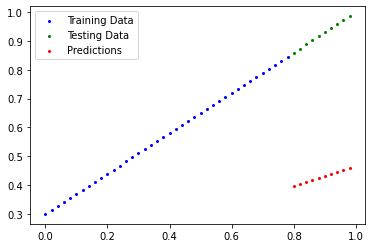

In [80]:
plot_predictions(predictions=y_preds)

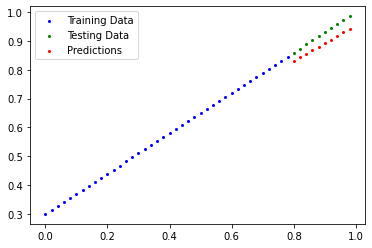

In [85]:
plot_predictions(predictions=y_preds_new)